In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import *
from utils import *
from config import *


In [2]:
train_loader, _,_ = create_dataloaders(
        npz_path="datasets/seq/15/seq_train.npz",
        batch_size=16,
        val_ratio=0,
        test_ratio=0
    )
val_loader, test_loader,_ = create_dataloaders(
        npz_path="datasets/seq/15/seq_validation.npz",
        batch_size=16,
        val_ratio=0,
        test_ratio=0
    )

# train_loader,val_loader, test_loader= create_dataloaders(
#         npz_path="datasets/seq/seq_gesture.npz",
#         batch_size=16,
#         val_ratio=0.3,
#         test_ratio=0.1
#     )

Dataset loaded. Total samples: 959
Feature shape: (959, 15, 99), Number of label classes: 5

Dataset split:
Training set: 959 samples
Validation set: 0 samples
Test set: 0 samples
Dataset loaded. Total samples: 464
Feature shape: (464, 15, 99), Number of label classes: 5

Dataset split:
Training set: 464 samples
Validation set: 0 samples
Test set: 0 samples


In [3]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMClassifier(input_size=99, hidden_size=64, num_layers=3, num_classes=5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# total_params = 0
# for name, param in model.named_parameters():
#     if param.requires_grad:
#         print(f"{name}: {param.numel()} parameters, shape: {param.shape}")
#         total_params+=param.numel()
# print(f"Total trainable parameters: {total_params}")

In [4]:
history = train(model, train_loader, val_loader, criterion, optimizer, device, epochs=50)


Epoch 1/50: Train Loss: 1.2595, Train Acc: 0.5162 | Val Loss: 1.0671, Val Acc: 0.5129
Epoch 2/50: Train Loss: 0.5918, Train Acc: 0.7852 | Val Loss: 0.7524, Val Acc: 0.7500
Epoch 3/50: Train Loss: 0.2118, Train Acc: 0.9312 | Val Loss: 0.6984, Val Acc: 0.8147
Epoch 4/50: Train Loss: 0.1430, Train Acc: 0.9531 | Val Loss: 0.9691, Val Acc: 0.7694
Epoch 5/50: Train Loss: 0.1799, Train Acc: 0.9395 | Val Loss: 0.5347, Val Acc: 0.8168
Epoch 6/50: Train Loss: 0.0897, Train Acc: 0.9604 | Val Loss: 0.6828, Val Acc: 0.7866
Epoch 7/50: Train Loss: 0.0307, Train Acc: 0.9802 | Val Loss: 0.7234, Val Acc: 0.8211
Epoch 8/50: Train Loss: 0.0148, Train Acc: 0.9823 | Val Loss: 0.9677, Val Acc: 0.7996
Epoch 9/50: Train Loss: 0.0082, Train Acc: 0.9833 | Val Loss: 0.7713, Val Acc: 0.8233
Epoch 10/50: Train Loss: 0.0053, Train Acc: 0.9833 | Val Loss: 0.7597, Val Acc: 0.8405
Epoch 11/50: Train Loss: 0.0029, Train Acc: 0.9844 | Val Loss: 0.8031, Val Acc: 0.8319
Epoch 12/50: Train Loss: 0.0020, Train Acc: 0.9844 |

train history saved to output/history_15.png


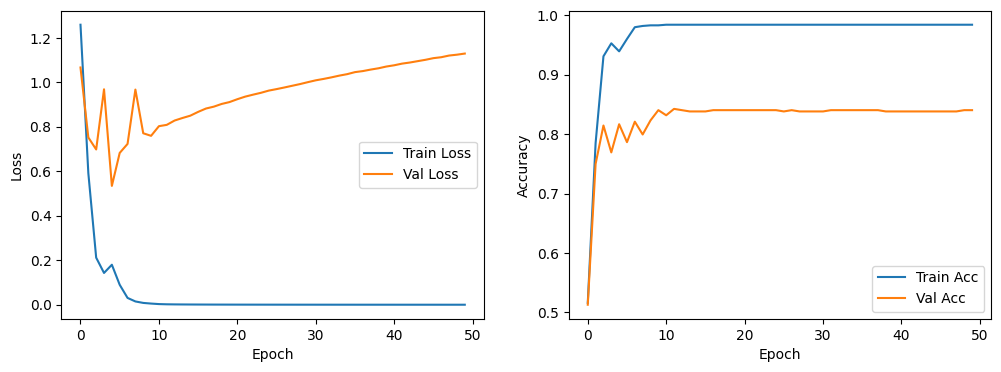

In [5]:

plot_history(history,save_path='output/history_15.png')

In [6]:
test_result = evaluate(model, val_loader,criterion, device)
test_true ,test_pred = test_result['y_true'],test_result['y_pred']
class_names =ACTIONS

Confusion matrix saved to output/confusion_matrix_raw_15.png


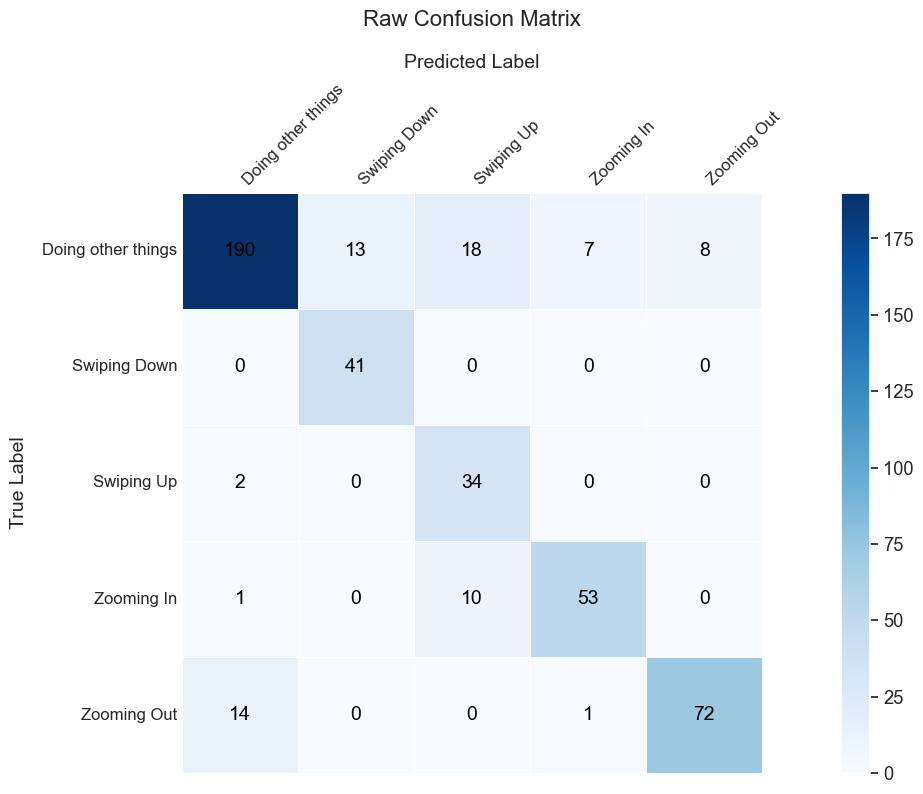

In [7]:

plot_confusion_matrix(test_true, test_pred, 
                     classes=class_names,
                     title='Raw Confusion Matrix',
                     save_path='output/confusion_matrix_raw_15.png')



Confusion matrix saved to output/confusion_matrix_norm_15.png


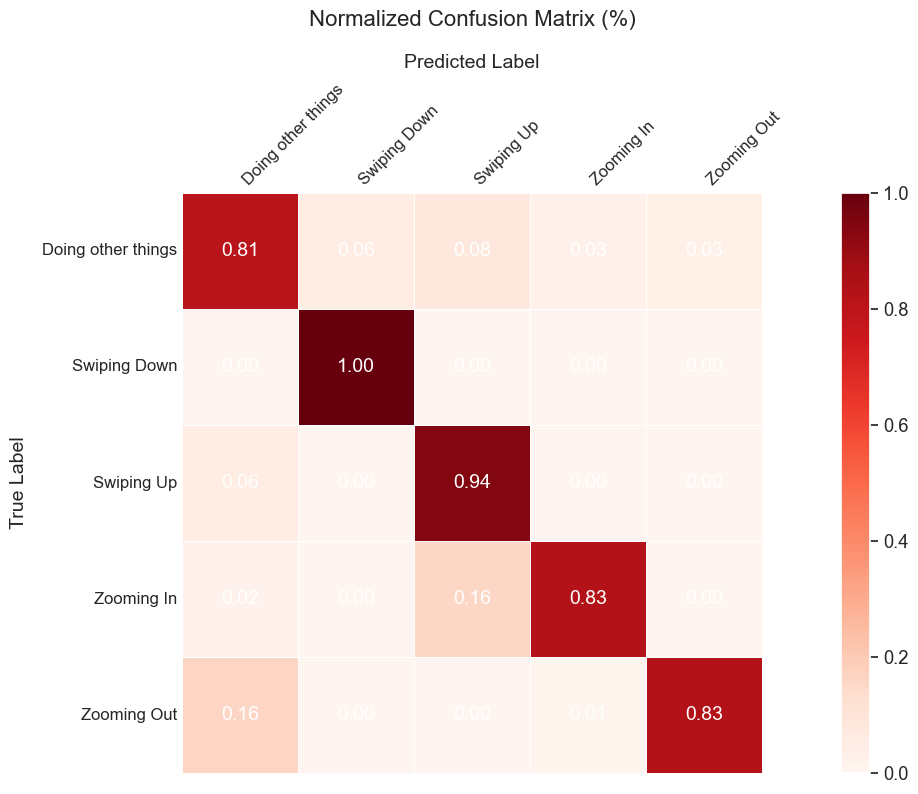

In [8]:

plot_confusion_matrix(test_true, test_pred, 
                     classes=class_names, normalize=True,
                     title='Normalized Confusion Matrix (%)',
                     cmap=plt.cm.Reds,
                     save_path='output/confusion_matrix_norm_15.png')

In [10]:
torch.save({
    'model_state_dict': model.state_dict(),
    'history': history
}, 'model/lstm_model_15.pth')